<br>
<div align="center"><span style="font-size:32px;color:darkblue"> Analyse Factorielle des correspondances</span></div><br><br>


#### Master MASERATI : Introduction à l'Analayse Factorielle Simple
- FOGUE FEUSSI Franck Jorel 
- HAKKA Rafik 
- KALAI AMINE 
- DIALLO Alpha Boubacar
- BENGONE AKOU Lajoi

<span>&#9757;</span> On commence par importer nos packages préférés `pandas` et `numpy`.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# path
os.chdir(r"C:\Users\lajoi\Documents\0_PARCOURS UNIVERSITAIRE\MASTER 2024-2026\UPEC - M1 -  2S - MASERATI DA\Analyse de données\Chapitre 3 - AFC\oral")

puis importer nos données et vérifier la taille et leur nature:

In [3]:
df = pd.read_excel("media.xls",sheet_name=0,header=0,index_col=0)
df

,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
Prof,,,,,,
Agriculteur,96,118,2,71,50,17
Petit.Patr.,122,136,11,76,49,41
Prof.Cad.Sup,193,184,74,63,103,79
Prof.Int.,360,365,63,145,141,184
Employe,511,593,57,217,172,306
Ouvr.Qualif.,385,457,42,174,104,220
Ouvr.Non-Qual.,156,185,8,69,42,85
Inactif,1474,1931,181,852,642,782


<span>&#9999;</span>  Quelles sont les deux variables étudiées?

Les variables étudiées sont : 
- **La catégorie socioprofessionnelle** (CSP) *(en ligne)*
- **Le type de média utilisé** *(en colonne)*
  
Ce tableau représente la distribution des effectifs selon **la profession des individus** et **leur mode d’accès à l’information**.

<span>&#9757;</span>  Créer les variables I et J contenant le nombre de modalités de chaque variable et les afficher

In [4]:
I = len(df.index) # les index correspondent aux modalités de la 1ère variable (CSP)
J = len(df.columns) # les colonnes sont les modalités de la 2ème variables (mode d'accès à l'information)

# Affichage
print(f'Nombre de modalités de la variable <Profession / CSP> : {I}')
print(f'Nombre de modalités de la variable <Type de média utilisé> : {J}')

Nombre de modalités de la variable <Profession / CSP> : 8
Nombre de modalités de la variable <Type de média utilisé> : 6


<span>&#9757;</span>  Créer la variable N contenant le nombre d'individus et l'afficher.

In [11]:
N = df.sum().sum()  # df.sum() renvoi la somme de chaque colonne
print(f'Nombre d"individus : {N}') # df.values.sum()

Nombre d"individus : 12388


On étudie ici 2 variables qualitatives. On va donc faire une analyse factorielle des correspondances. Pour cela on utilise la classe `CA` du package `fanalysis`. Ce package a été développé récemment par Olivier Garcia, vous pouvez avoir plus de renseignement sur la page https://github.com/OlivierGarciaDev. Il va nous fournir plein de calculs et graphiques clef en main. Ce package peut aussi être utilisé pour faire une ACP (et eviter de calculer à la main les qualités et les contributions comme nous l'avons fait au TP1).

Ce package n'est a priori pas déjà installé dans votre Anaconda. Il faut passer par Anaconda prompt pour l'installer: https://datatofish.com/how-to-install-python-package-in-anaconda/

In [12]:
pip install fanalysis

Note: you may need to restart the kernel to use updated packages.


In [13]:
import fanalysis

Ici les données sont déjà sous forme de tableau de contingence. Sinon, on aurait pu utiliser la fonction `crosstab` sur les données brutes pour extraire ce tableau.

Dans le cas d'un tableau de contingence, les données en lignes et en colonnes jouent le même role (il n'y a pas d'opposition individus/variables). Le dataframe n'est donc pas le format approprié. La package `fanalysis` travaille sur les numpy.array et pas des dataframe. Dans la suite, on va donc transformer notre dataframe en tableau (quitte à utiliser pd.DataFrame pour un affichage agréable).

In [14]:
tab=df.values
tab

array([[  96,  118,    2,   71,   50,   17],
       [ 122,  136,   11,   76,   49,   41],
       [ 193,  184,   74,   63,  103,   79],
       [ 360,  365,   63,  145,  141,  184],
       [ 511,  593,   57,  217,  172,  306],
       [ 385,  457,   42,  174,  104,  220],
       [ 156,  185,    8,   69,   42,   85],
       [1474, 1931,  181,  852,  642,  782]])

On ferra bien attention dans la suite: df est le dataframe, tab est le tableau des valeurs.

# Liaison

On commence par vérifier si nos variables sont liées, on effectue donc un test d'indépendance du $\chi^2$. On utilise par exemple celui de la librairie `scipy`. La fonction chi2_contengency appliqué à un tableau croisé va renvoyer 4 informations:
- la valeur de la statistique de test
- la p-valeur
- le nombre de degré de liberté, c'est-à-dire le paramètre du $\chi^2:~ (I-1)\times (J-1)$
- le tableau des effectifs indépendants.


In [15]:
from scipy.stats import chi2_contingency

<span>&#9757;</span>  Faire un test du $\chi^2$ sur `df`.

In [16]:
chi = chi2_contingency(df)
print(chi)

Chi2ContingencyResult(statistic=np.float64(275.9953222418554), pvalue=np.float64(3.150917316170306e-39), dof=35, expected_freq=array([[  94.21520827,  113.41830804,   12.5163061 ,   47.6362609 ,
          37.23458185,   48.97933484],
       [ 115.77292541,  139.36995479,   15.38020665,   58.53608331,
          45.75435906,   60.18647078],
       [ 185.23668066,  222.99192767,   24.60833064,   93.65773329,
          73.20697449,   96.29835325],
       [ 334.8099774 ,  403.05150145,   44.4788505 ,  169.28366161,
         132.31950274,  174.0565063 ],
       [ 493.96448176,  594.64514046,   65.62221505,  249.75395544,
         195.21859864,  256.79560865],
       [ 367.81191476,  442.77994834,   48.86309332,  185.96980949,
         145.36212464,  191.21310946],
       [ 145.04883758,  174.61293187,   19.26945431,   73.33831127,
          57.32442686,   75.4060381 ],
       [1560.13997417, 1878.13028737,  207.26154343,  788.82418469,
         616.57943171,  811.06457862]]))


<span>&#9999;</span> Répondez aux questions suivantes:
- Rappeler les hypothèses nulle et alternative de ce test.
- Combien vaut la statistique de test?
- Quelle est la conclusion du test?
- Vérifier que le degré de liberté est le bon.
- Combien vaut l'effectif sous hypotheses d'indépendance des agriculteurs qui s'informent par la télévision.

**REPONSES**
- Hypothèse nulle : les variables < Profession/CSP > et < Type de média utilisé > **sont indépendantes** *(il n'existe aucune relation entre elles.)*
- Hypothèse alternative : les variables < Profession/CSP > et < Type de média utilisé > **ne sont pas indépendantes** *(donc il existe une relation entre elles.)*
- La statistique de test vaut : **275.995**
- La pvalue < 0.05 : donc au seuil de 5% on rejette l'hypothèse nulle d'indépendance. On conclut ainsi que les variables ne sont pas indépendantes, il existe une relation entre la catégorie socioprofessionnelle et le type de média utilisé pour s'informer.
- On a (I-1)x(J-1) = (8-1)x(6-1) = 7x5 = **35**  (le test affiche dof = 35) : *Le degré de liberté est donc bon.*
- Sous hypothese d'indépendance, l'effectif des agriculteurs qui s'informent par la télévision vaut : **113.4183**

In [26]:
# Statistique du test
X = chi.statistic
print(f'Statistique du test : {X}')

# Degré de liberté
print(f'Degré de liberté : {chi.dof}')

Statistique du test : 275.9953222418554
Degré de liberté : 35


In [19]:
pd.DataFrame(chi.expected_freq, columns=df.columns, index=df.index)

,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
Prof,,,,,,
Agriculteur,94.215208,113.418308,12.516306,47.636261,37.234582,48.979335
Petit.Patr.,115.772925,139.369955,15.380207,58.536083,45.754359,60.186471
Prof.Cad.Sup,185.236681,222.991928,24.608331,93.657733,73.206974,96.298353
Prof.Int.,334.809977,403.051501,44.478851,169.283662,132.319503,174.056506
Employe,493.964482,594.645140,65.622215,249.753955,195.218599,256.795609
Ouvr.Qualif.,367.811915,442.779948,48.863093,185.969809,145.362125,191.213109
Ouvr.Non-Qual.,145.048838,174.612932,19.269454,73.338311,57.324427,75.406038
Inactif,1560.139974,1878.130287,207.261543,788.824185,616.579432,811.064579


<span>&#9757;</span> Combien vaut l'inertie?

In [20]:
# Calcul de l'inertie : 
inertie = chi.statistic/N
print(f'L"inertie vaut : {inertie}')

L"inertie vaut : 0.022279247839994784


 <span>&#9757;</span> Vérifier par le calcul la  valeur du coefficient d'associtation du $\chi^2$.

In [21]:
# V de Cramer pour mesurer l’intensité de l’association entre deux variables qualitatives
V = np.sqrt(X/(N*(I-1)))
print(f'V de Cramer : {V}')

NameError: name 'X' is not defined

**L'association entre les 2 variables est faible.**

# Profils lignes, profils colonnes

On va maintenant calculer les profils lignes et colonnes.

 <span>&#9757;</span> Créer 2 variables `media` et `prof` avec les effectifs marginaux.

In [22]:
media = df.sum()
prof = df.sum(axis=1)

print("EFFECTIFS MARGINAUX COLONNES")
print(media)

print("EFFECTIFS MARGINAUX LIGNES")
print(prof)

EFFECTIFS MARGINAUX COLONNES
Radio         3297
Tel.          3969
Quot.Nat.      438
Quot.Reg.     1667
Press.Mag.    1303
Press.TV      1714
dtype: int64
EFFECTIFS MARGINAUX LIGNES
Prof
Agriculteur        354
Petit.Patr.        435
Prof.Cad.Sup       696
Prof.Int.         1258
Employe           1856
Ouvr.Qualif.      1382
Ouvr.Non-Qual.     545
Inactif           5862
dtype: int64


Attention, verifiez bien que vous n'avez pas inversé les 2 en regardant leurs dimensions.

 <span>&#9757;</span> Créer, à l'aide d'une double boucle for par exemple, les tableaux des profils lignes `profil_row` et des profils colonnes `profil_col`.

In [24]:
### TABLEAU DES PROFILS LIGNES 
liste = [] # on crée une liste qui va contenir les listes des profils lignes calculés
for i in range(I):
    eff = tab[i]/prof.iloc[i]  # profil ligne de la i-ème modalité de la variable < profession>
    liste.append(eff) # ajoute dans liste.
profil_row = pd.DataFrame(liste, columns=df.columns, index=df.index) # transforme la liste en DataFrame
profil_row

,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
Prof,,,,,,
Agriculteur,0.271186,0.333333,0.005650,0.200565,0.141243,0.048023
Petit.Patr.,0.280460,0.312644,0.025287,0.174713,0.112644,0.094253
Prof.Cad.Sup,0.277299,0.264368,0.106322,0.090517,0.147989,0.113506
Prof.Int.,0.286169,0.290143,0.050079,0.115262,0.112083,0.146264
Employe,0.275323,0.319504,0.030711,0.116918,0.092672,0.164871
Ouvr.Qualif.,0.278582,0.330680,0.030391,0.125904,0.075253,0.159190
Ouvr.Non-Qual.,0.286239,0.339450,0.014679,0.126606,0.077064,0.155963
Inactif,0.251450,0.329410,0.030877,0.145343,0.109519,0.133402


In [25]:
### TABLEAU DES PROFILS COLONNES
liste = []
for j in range(J):
    eff = tab[:,j]/media.iloc[j] # profil colonne de la j-ème modalité de la variable < média >
    liste.append(eff)
profil_col = pd.DataFrame(np.transpose(liste), columns=df.columns, index=df.index)
profil_col

,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
Prof,,,,,,
Agriculteur,0.029117,0.029730,0.004566,0.042591,0.038373,0.009918
Petit.Patr.,0.037003,0.034266,0.025114,0.045591,0.037606,0.023921
Prof.Cad.Sup,0.058538,0.046359,0.168950,0.037792,0.079048,0.046091
Prof.Int.,0.109190,0.091963,0.143836,0.086983,0.108212,0.107351
Employe,0.154989,0.149408,0.130137,0.130174,0.132003,0.178530
Ouvr.Qualif.,0.116773,0.115142,0.095890,0.104379,0.079816,0.128355
Ouvr.Non-Qual.,0.047316,0.046611,0.018265,0.041392,0.032233,0.049592
Inactif,0.447073,0.486521,0.413242,0.511098,0.492709,0.456243


On peut vérifier que nos profils somment bien à 1:

In [26]:
print(np.sum(profil_row,axis=1))
print(np.sum(profil_col,axis=0))

Prof
Agriculteur       1.0
Petit.Patr.       1.0
Prof.Cad.Sup      1.0
Prof.Int.         1.0
Employe           1.0
Ouvr.Qualif.      1.0
Ouvr.Non-Qual.    1.0
Inactif           1.0
dtype: float64
Radio         1.0
Tel.          1.0
Quot.Nat.     1.0
Quot.Reg.     1.0
Press.Mag.    1.0
Press.TV      1.0
dtype: float64


Pour les visualiser, on utilise:

In [27]:
import matplotlib.pyplot as plot

In [ ]:
#df_profil_row=pd.DataFrame(profil_row,index=df.index,columns=df.columns)
#df_profil_row

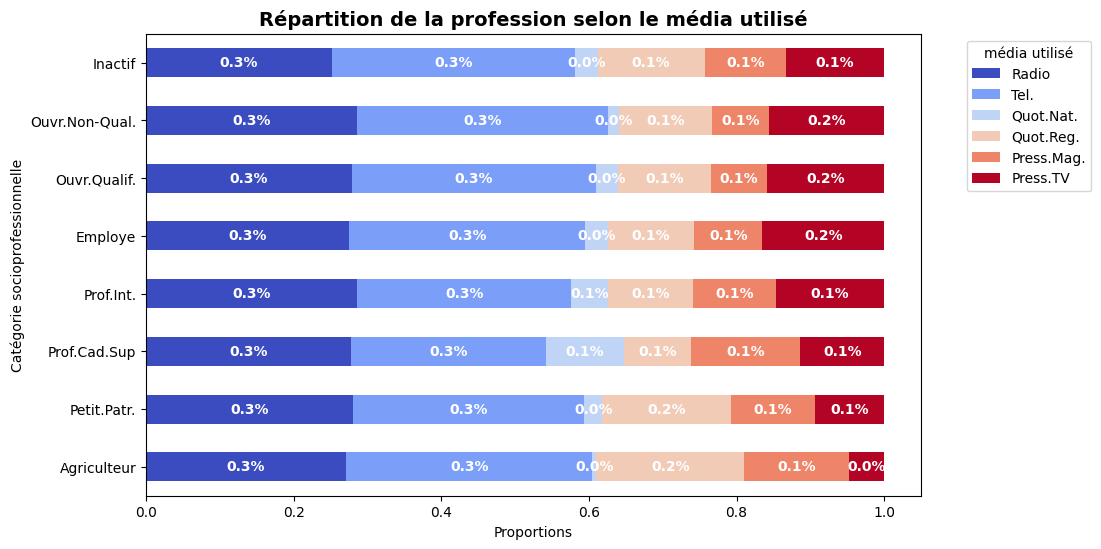

In [29]:
ax = profil_row.plot.barh(stacked=True, edgecolor='none', figsize=(10, 6), colormap="coolwarm")
plot.title("Répartition de la profession selon le média utilisé", fontsize=14, fontweight='bold')
plot.xlabel("Proportions")
plot.ylabel("Catégorie socioprofessionnelle")
for bars in ax.containers:  
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white', fontsize=10, weight='bold')
plot.legend(title="média utilisé", bbox_to_anchor=(1.05, 1), loc='upper left')
plot.show()

In [ ]:
#pd.DataFrame(profil_col.T,index=df.columns,columns=df.index).plot.barh(stacked=True, edgecolor='none')

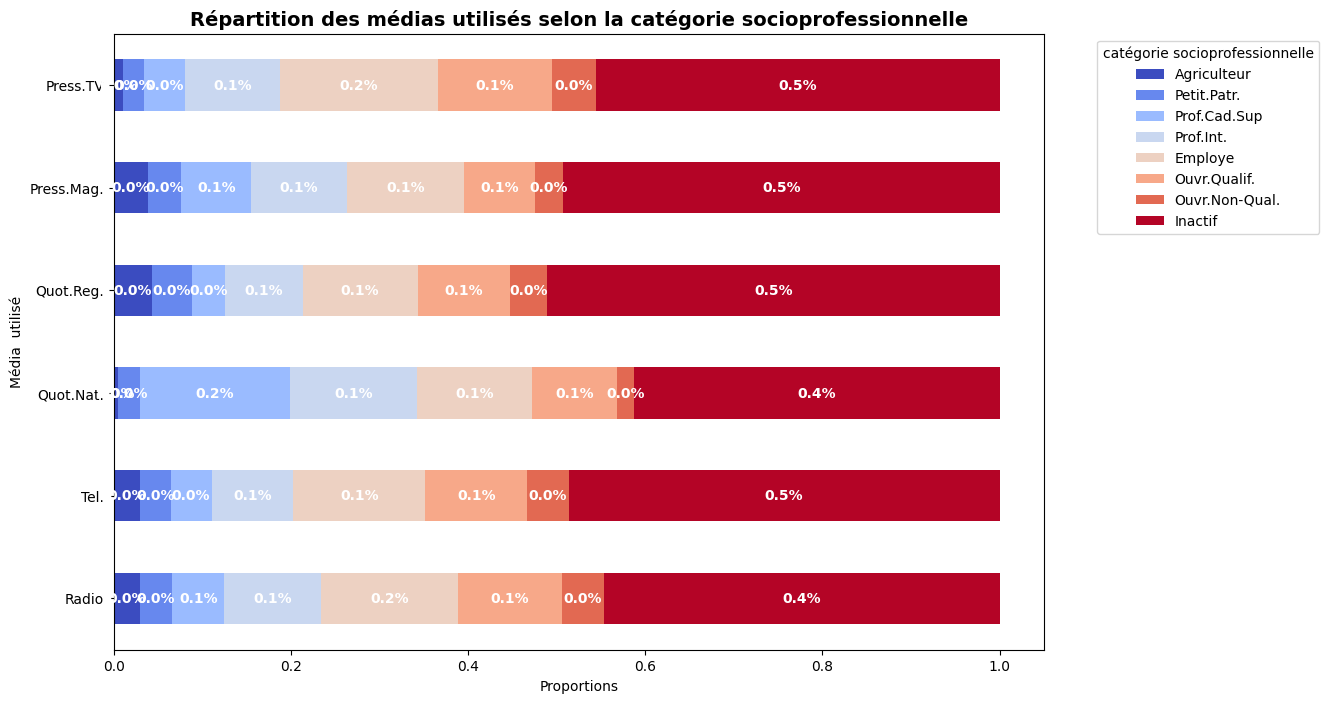

In [36]:
ax = np.transpose(profil_col).plot.barh(stacked=True, edgecolor='none', figsize=(12, 8), colormap="coolwarm")
plot.title("Répartition des médias utilisés selon la catégorie socioprofessionnelle", fontsize=14, fontweight='bold')
plot.xlabel("Proportions")
plot.ylabel("Média  utilisé")
for bars in ax.containers:  
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white', fontsize=10, weight='bold')
plot.legend(title="catégorie socioprofessionnelle", bbox_to_anchor=(1.05, 1), loc='upper left')
plot.show()

# AFC avec la classe CA

## Instanciation

On crée une instance de la classe `CA`, en lui précisant les étiquettes des lignes et des colonnes puis on applique le modèle à nos données en utilisant `fit` sur notre tableau. Ce tableau doit être un tableau de contingence, au format numpy.array.

In [37]:
from fanalysis.ca import CA

In [38]:
df_afc = CA(row_labels=df.index.values, col_labels=df.columns.values)
df_afc.fit(tab)

CA(col_labels=array(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   row_labels=array(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.',
       'Employe', 'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype=object))

On peut comme argument à CA le nombres d'axes à garder en précisant: `n_components=`. Pour l'instant on préfère ne pas le faire.

Cette méthode `df_afc.fit(df.values)` contient notamment les attributs suivants:
- `df_afc.eig_` donne les valeurs propres, les pourcentages d'inertie expliquée et les pourcentages cumulés.
- `df_afc.row_coord_` donne les coordonnées des points lignes selon les axes factoriels
- `df_afc.col_coord_` donne les coordonnées des points colonnes selon les axes factoriels


## Valeurs propres

In [45]:
pd.DataFrame(df_afc.eig_)

,0,1,2,3,4
0,0.013857,0.007211,0.000825,0.000304,0.000083
1,62.198181,32.365029,3.701792,1.363833,0.371166
2,62.198181,94.563209,98.265001,99.628834,100.000000


<span>&#9999;</span> Combien y a-t-il de valeurs propres? Est-ce cohérent?

Il y'a 5 valeurs propres. le nombre de valeurs propres est **min{I-1,J-1} = min {8-1,6-1} = min {7,5} = 5**. Donc oui, c'est cohérent 

<span>&#9999;</span> Combien valent les deux premières valeurs propres?

Les deux premières valeurs propres valent : **0.01386** et **0.00721**

<span>&#9757;</span> Retrouver la valeur de l'inertie.

In [42]:
# Retrouvons la valeur de l'inertie
df_afc.eig_[0].sum()

np.float64(0.022279247839994777)

On peut tracer les valeurs propres grâce à la fonction suivante (même pas besoin de les extraire nous même, et oui c'est pratique quand quelqu'un crée un package sur mesure!):

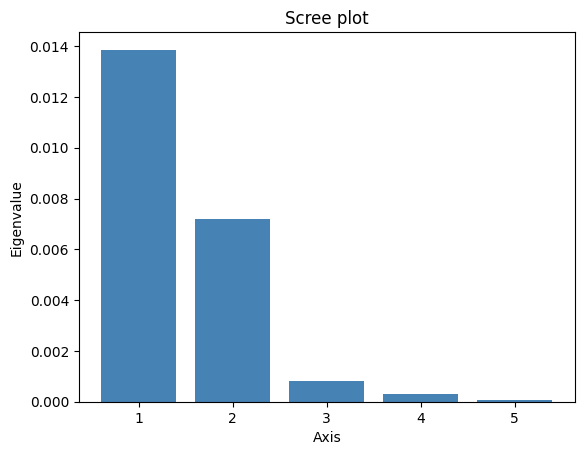

In [43]:
df_afc.plot_eigenvalues()

Vous pouvez aussi tracer les pourcentages ou les pourcentafes cumulés à l'aide des commandes suivantes:

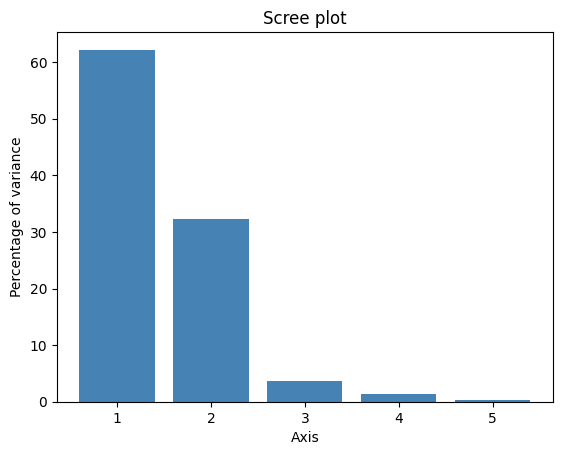

In [44]:
df_afc.plot_eigenvalues(type="percentage")

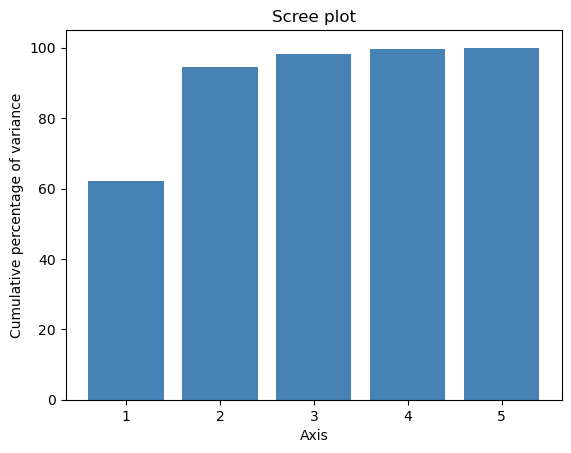

In [100]:
df_afc.plot_eigenvalues(type="cumulative")

<span>&#9999;</span> Quel est le pourcentage expliqué par les 2 premiers axes? Combien d'axes faut-il garder d'après vous? 

**94.56 %**.   On garde 2 axes factorielles

## Nouvelles coordonnées des poins lignes et colonnes

On rappelle que l'AFC voit les profils lignes et les profils colonnes comme des points dans un espace à plusieurs dimensions. Le but d'en extraire des représentations graphiques dans un (ou plusieurs) plan factoriel.


In [46]:
df_afc.row_coord_

array([[ 0.16614986,  0.30961174, -0.07183812, -0.01443258,  0.02144011],
       [ 0.06837709,  0.14315064, -0.0644217 ,  0.02037032, -0.02568674],
       [-0.42997558,  0.06087258, -0.00302124,  0.01681116,  0.01123318],
       [-0.10660251, -0.03259679, -0.03089814, -0.02533304, -0.01195531],
       [ 0.01572857, -0.09546893, -0.00508681, -0.02029446,  0.00346168],
       [ 0.04371252, -0.1013786 , -0.01932335,  0.03541129, -0.00173011],
       [ 0.11779685, -0.09486419, -0.03972798,  0.00349309,  0.02248439],
       [ 0.0325837 ,  0.03339524,  0.02596802,  0.00055285, -0.00093525]])

In [47]:
df_afc.col_coord_

array([[-0.01494022, -0.02210596, -0.04670175, -0.00266194,  0.00068016],
       [ 0.05328288, -0.002081  ,  0.01645288,  0.0112183 ,  0.00985007],
       [-0.54067502,  0.00620677,  0.02054203,  0.03952278, -0.00661745],
       [ 0.10882837,  0.10964537,  0.00522829,  0.01304161, -0.01656044],
       [-0.09481257,  0.13249659,  0.01875847, -0.03830946,  0.0037189 ],
       [ 0.00975363, -0.16160888,  0.02714057, -0.01451757, -0.00914728]])

On n'a pas vraiment besoin de ces fonctions car le package fanalysis nous fournit un outil pour faire la representation graphique directement (cf ci dessous).

## Contributions et qualités

Lors de l'instanciation de l'AFC, d'autres quantités interessantes ont été automatiquement calculées telles que: 
* `df_afc.row_contrib_` : contributions des profils (ou modalités) lignes à l'inertie de l'axe
* `df_afc.col_contrib_` : contributions des profils (ou modalités) colonnes à l'inertie de l'axe
* `df_afc.row_cos2_` : qualités (dites cosinus carrés) des points lignes
* `df_afc.col_cos2_` : qualités (dites cosinus carrés) des points colonnes

*Remarque:* Si l'on avait souhaité éviter le calcul de ces quantités pour gagner du temps et économiser des ressources mémoire, il aurait fallu préciser `stats=False` en argument de `CA`.

# Représentations graphiques et interpretations

## Représentations graphiques

On utilise les coordonnées obtenues précédemment pour représenter sur un même plan nos poinst lignes et colonnes grâce à la fonction `mapping`. On précise en paramètres quels sont les axes que l'on souhaite représeter.

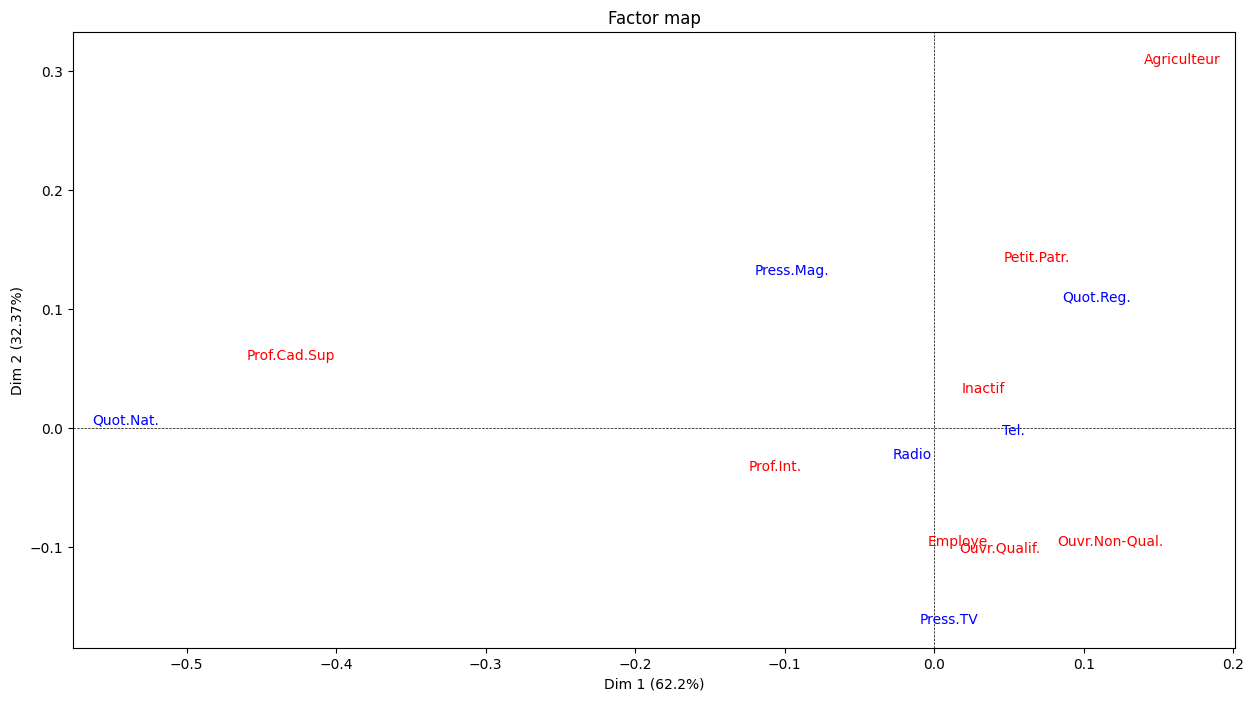

In [48]:
df_afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(15, 8))

Si on ne souhaite que les points lignes on utilise la commande suivante:

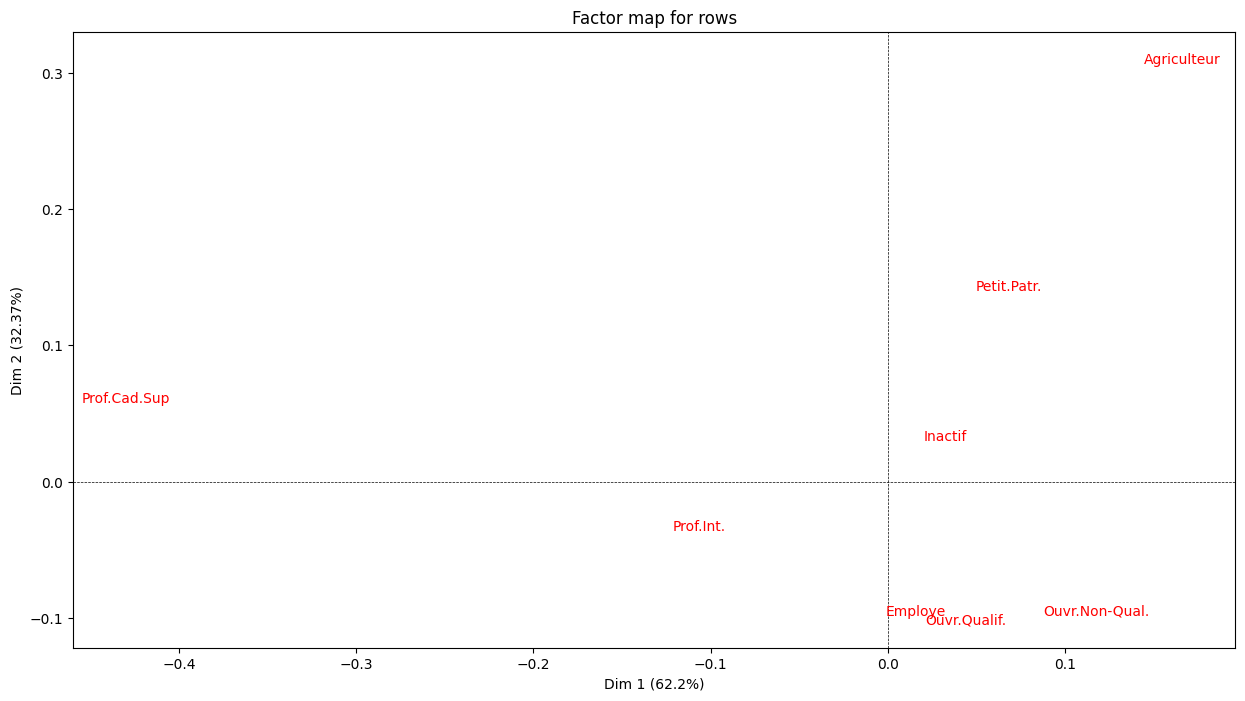

In [49]:
df_afc.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(15, 8))

<span>&#9757;</span> Afficher uniquement les points colonnes

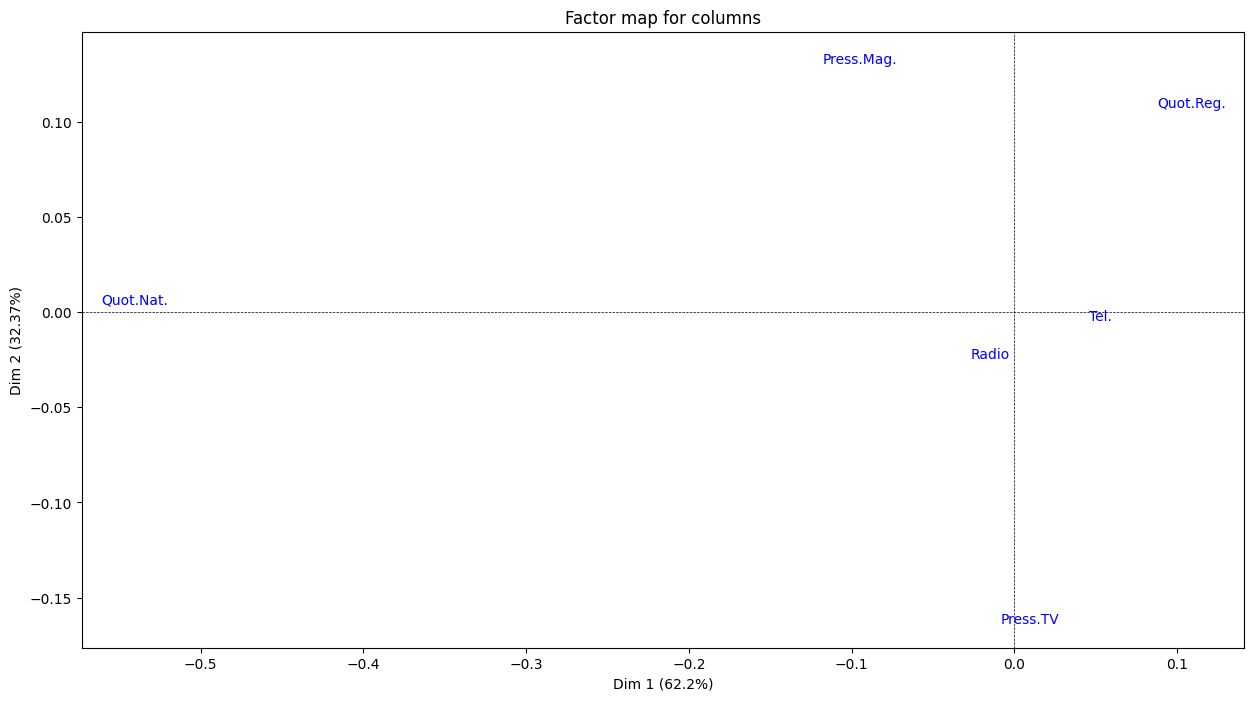

In [50]:
df_afc.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(15, 8))

<span>&#9757;</span> Afficher les points lignes et colonnes dans le plan constitué du premier et du troisième axe.

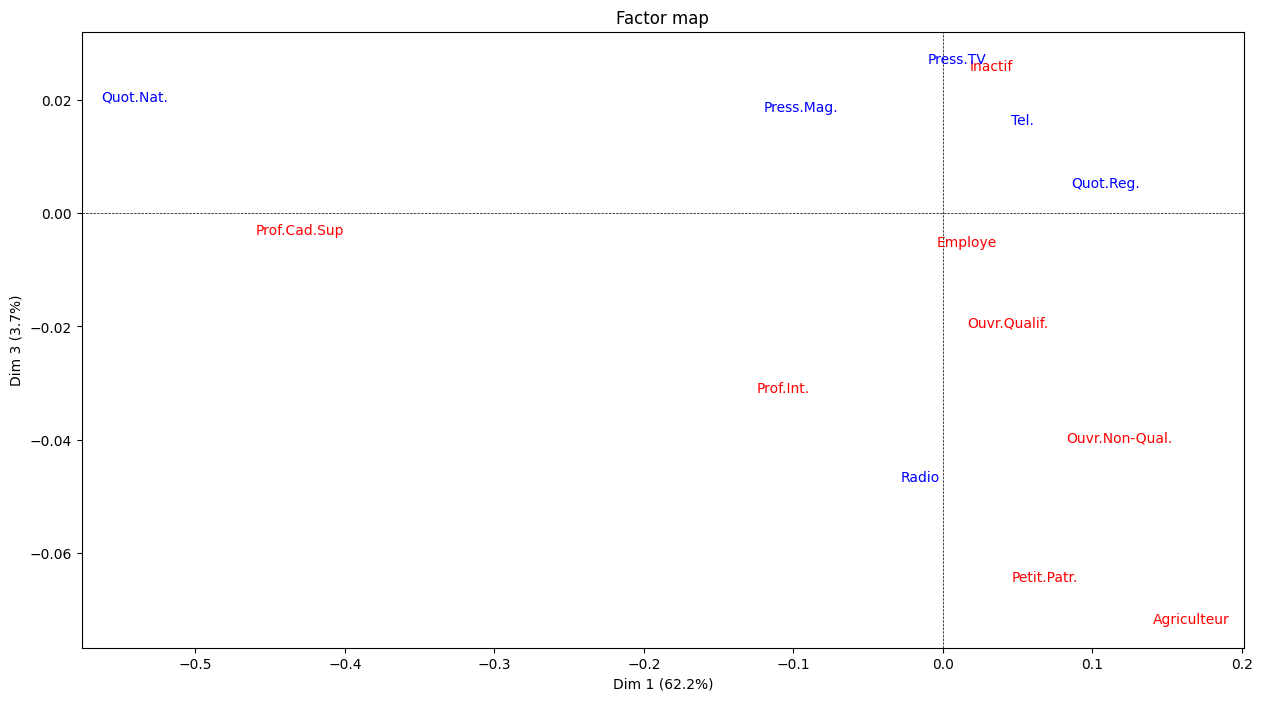

In [51]:
df_afc.mapping(num_x_axis=1, num_y_axis=3, figsize=(15, 8))

## Interprétation

Pour interpréter les axes, on va utiliser les qualités et les contributions. Encore une fois, le package fanalysis nous fournit tous les graphiques dont nous avons besoin sans effort. La commande suivante permet de visualiser rapidement les contributions des points lignes au premier axe puis de vérifier leurs qualités de représentations.

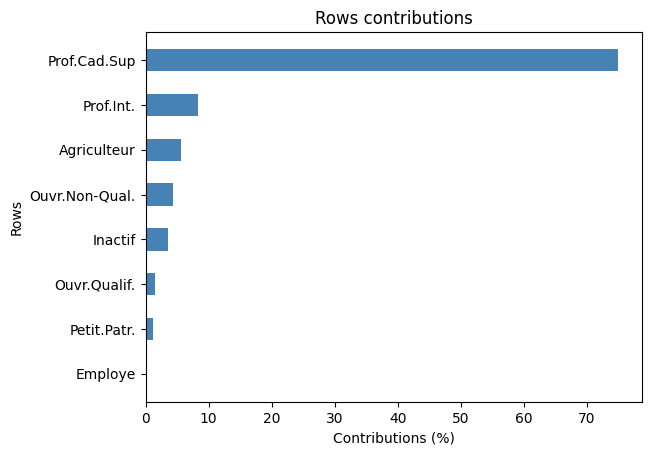

In [52]:
df_afc.plot_row_contrib(num_axis=1)

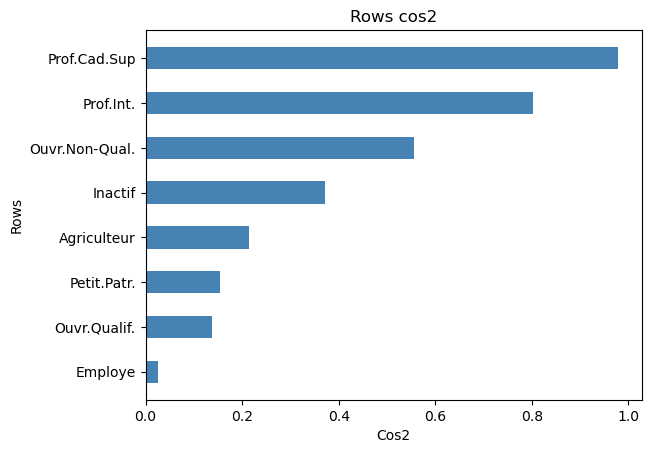

In [116]:
df_afc.plot_row_cos2(num_axis=1)

<span>&#9757;</span> Afficher les contributions des points colonnes au premier axe, et leurs qualités.

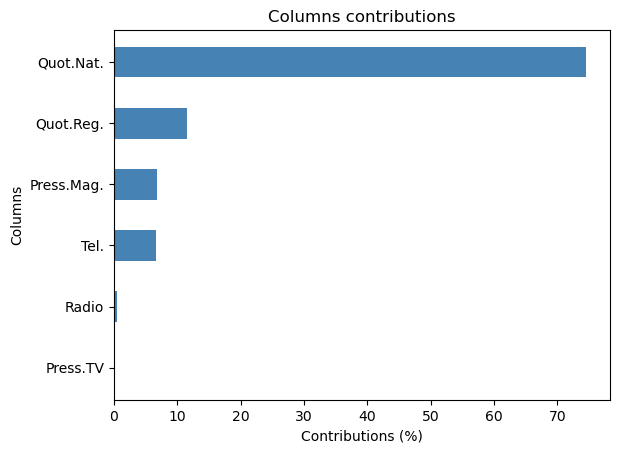

In [270]:
df_afc.plot_col_contrib(num_axis=1)

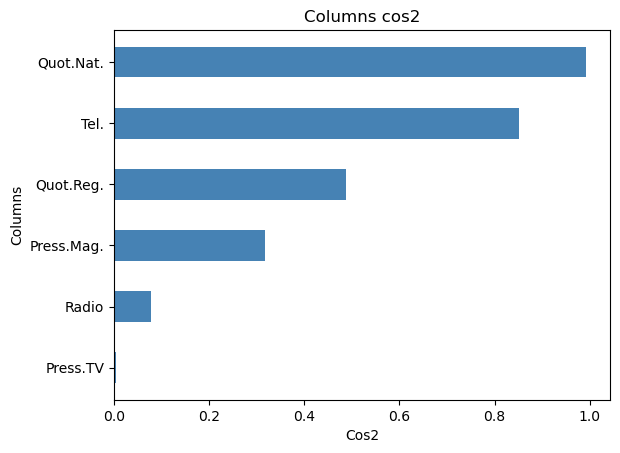

In [283]:
df_afc.plot_col_cos2(num_axis=1)

<span>&#9999;</span> Interpréter, si possible, le premier axe.

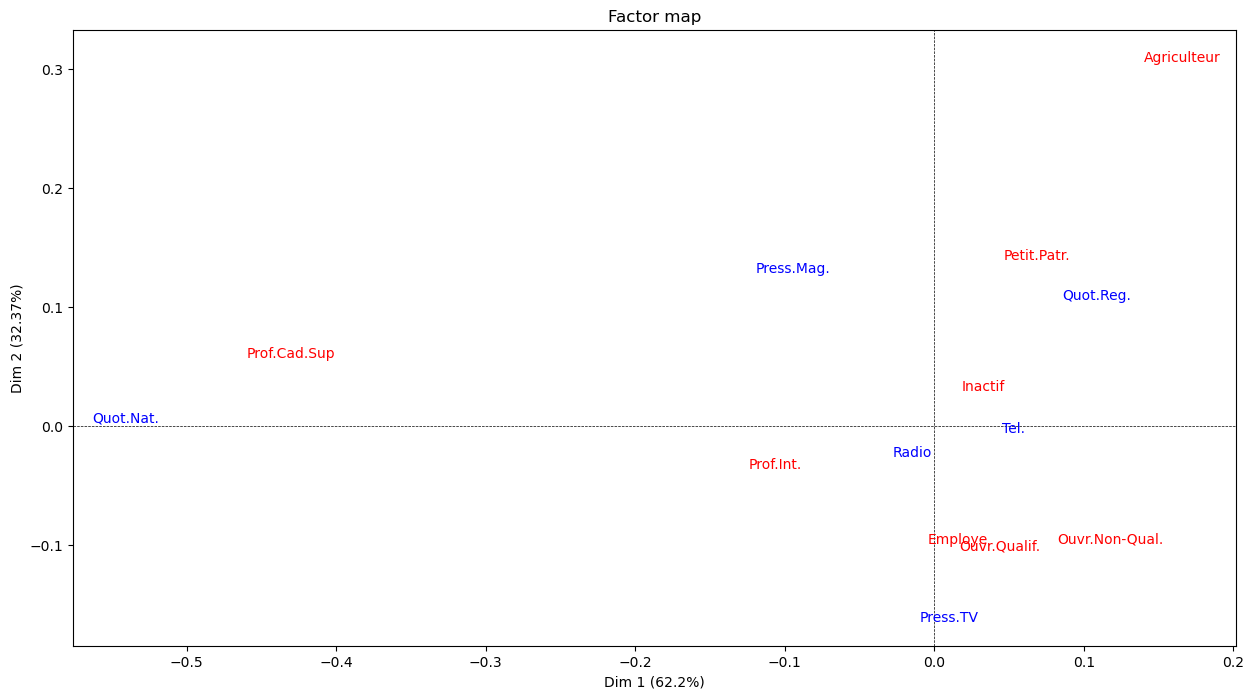

In [274]:
df_afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(15, 8))

<span>&#9757;</span> Afficher les contributions des points lignes au deuxieme axe et leurs qualités..

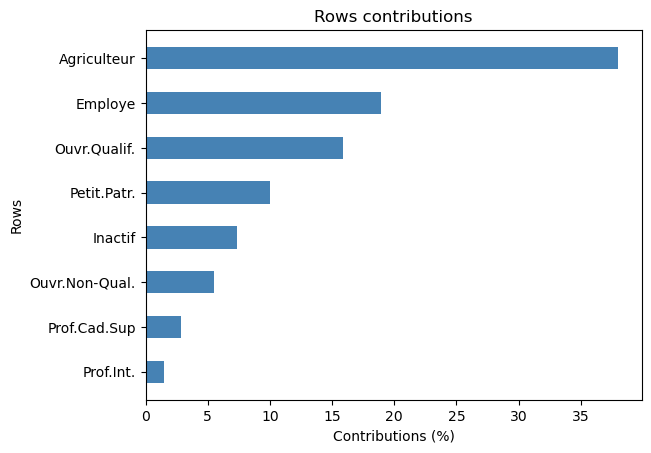

In [285]:
df_afc.plot_row_contrib(num_axis=2)

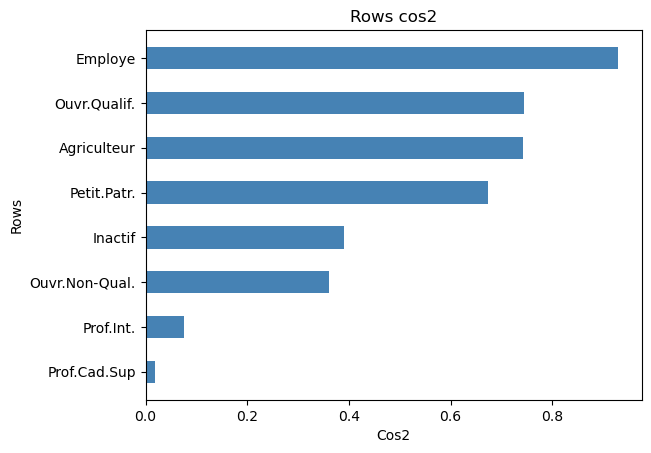

In [287]:
df_afc.plot_row_cos2(num_axis=2)

<span>&#9757;</span> Afficher les contributions des points colonnes au deuxieme axe et leurs qualités.

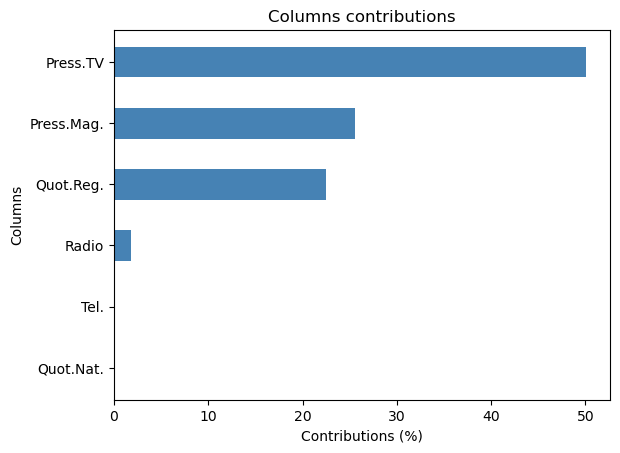

In [292]:
df_afc.plot_col_contrib(num_axis=2)

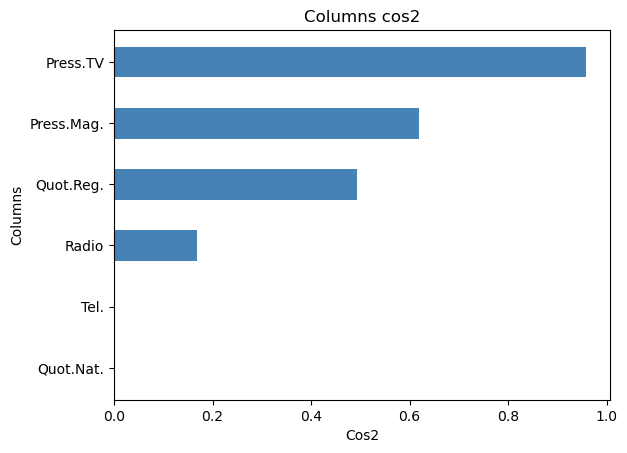

In [294]:
df_afc.plot_col_cos2(num_axis=2)

<span>&#9999;</span> Interpréter, si possible, le deuxieme axe.

# Compléments 

Analyse Factorielle Multiple